# From Scratch to Scikit-learn: Regression & Classification (CSC 422)

**Duration:** 2 hours  
**Format:** Live coding with student participation  
**Course:** CSC 422 - Machine and Deep Learning

---

## Learning Goals

By the end of class, students should:
- Recognize the value of using libraries (scikit-learn) vs. coding from scratch
- Implement regression with scikit-learn and compare with their scratch version
- Understand the general pipeline of supervised ML (fit → predict → evaluate)
- Be introduced to core shallow classifiers (kNN, logistic regression, Naïve Bayes)
- Practice applying models to small datasets with scikit-learn

---

## ⏱ Timeline

- **0–15 min** — Bridge from Scratch to Library
- **15–40 min** — Supervised ML Workflow with Scikit-learn
- **40–60 min** — Transition to Classification
- **60–90 min** — Shallow Classification Models with Scikit-learn
- **90–115 min** — Guided Lab Exercise
- **115–120 min** — Wrap-Up & Forward Look

---

## Setup

We'll need both basic scientific computing tools and scikit-learn for today's exploration.

In [1]:
# Essential imports for scientific computing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Scikit-learn imports for machine learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes, load_iris

In [3]:
# Evaluation metrics and utilities
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reproducibility and verification
np.random.seed(42)
print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


---

# 0–15 min: Bridge from Scratch to Library

**Goal:** Connect IC_2's mathematical foundations to professional machine learning tools

**Instructor Notes:**
• Start by asking students to recall what they built last class
• Emphasize that we're building on mathematical foundations, not abandoning them
• Key message: libraries make us more productive, not less knowledgeable
• Preview that sklearn uses the same math "under the hood"

## Review: What We Built in IC_2

Last class, we implemented gradient descent from scratch. Today, we'll see how scikit-learn uses the same mathematical principles with a much cleaner interface.

In [5]:
# Recreate the same dataset from IC_2
a_true, b_true = 2.5, -1.0
n_points = 100

# Generate identical noisy linear data
x = np.random.uniform(-2, 2, n_points)
y = a_true * x + b_true + np.random.normal(0, 0.5, n_points)

print(f"Dataset: {n_points} points with noise")

Dataset: 100 points with noise


In [6]:
# Train/test split (same as IC_2)
split_idx = int(0.8 * n_points)
x_train, y_train = x[:split_idx], y[:split_idx]
x_test, y_test = x[split_idx:], y[split_idx:]

print(f"Split: {len(x_train)} train, {len(x_test)} test")

Split: 80 train, 20 test


## The "Hand-Rolled" Approach (IC_2 Review)

**Instructor Notes:**
• Code this live to refresh memory - don't just read it
• Point out the complexity: loops, gradient calculations, parameter updates
• Ask: "What could go wrong with this approach?"
• Mention: bugs, numerical instability, performance issues

Let's quickly recreate our gradient descent solution:

In [7]:
# Our scratch gradient descent (simplified version)
def train_scratch(x, y, learning_rate=0.1, steps=100):
    a, b = 0.0, 0.0
    n = len(x)
    
    for _ in range(steps):
        # Compute gradients
        pred = a * x + b
        grad_a = (2/n) * np.sum((pred - y) * x)
        grad_b = (2/n) * np.sum(pred - y)
        
        # Update parameters
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
    
    return a, b

In [8]:
# Train with our scratch implementation
a_scratch, b_scratch = train_scratch(x_train, y_train)
scratch_mse = np.mean((y_test - (a_scratch * x_test + b_scratch))**2)

print(f"Scratch result: a={a_scratch:.3f}, b={b_scratch:.3f}")
print(f"Test MSE: {scratch_mse:.4f}")

Scratch result: a=2.421, b=-1.041
Test MSE: 0.2439


## The Scikit-Learn Way

**Instructor Notes:**
• Emphasize the dramatic simplification (15 → 3 lines)
• Point out we still need to understand what's happening inside
• Mention that sklearn handles edge cases, optimization, and testing
• Show that results are identical - this builds trust

Watch how ~15 lines of gradient descent becomes 3 lines of sklearn:

In [9]:
# Reshape data for sklearn (expects 2D arrays)
X_train = x_train.reshape(-1, 1)
X_test = x_test.reshape(-1, 1)

print(f"Reshaped: {x_train.shape} → {X_train.shape}")

Reshaped: (80,) → (80, 1)


In [10]:
# The sklearn magic: fit → predict → evaluate
model = LinearRegression()
model.fit(X_train, y_train)
sklearn_mse = mean_squared_error(y_test, model.predict(X_test))

print(f"Sklearn result: a={model.coef_[0]:.3f}, b={model.intercept_:.3f}")
print(f"Test MSE: {sklearn_mse:.4f}")

Sklearn result: a=2.421, b=-1.041
Test MSE: 0.2439


In [11]:
# Compare results
print(f"🎯 COMPARISON:")
print(f"Scratch:  MSE = {scratch_mse:.4f}")
print(f"Sklearn:  MSE = {sklearn_mse:.4f}")
print(f"Difference: {abs(scratch_mse - sklearn_mse):.6f}")
print("✅ Nearly identical results!")

🎯 COMPARISON:
Scratch:  MSE = 0.2439
Sklearn:  MSE = 0.2439
Difference: 0.000000
✅ Nearly identical results!


## 🗣️ Discussion Break (2 minutes)

**Question for students:** *"When would you implement from scratch vs. use a library like scikit-learn?"*

**Think about:**
- Learning and understanding
- Production systems
- Custom requirements
- Time constraints

---

# 15–40 min: Supervised ML Workflow with Scikit-learn

**Goal:** Master the universal pipeline that works for ANY supervised learning problem

**Instructor Notes:**
• This is the most important section - the workflow they'll use forever
• Emphasize "universal" - works for any algorithm, any dataset
• Connect to software engineering: standardized APIs, consistent patterns
• Mention this pipeline works for deep learning too (later in course)

## The Universal ML Pipeline

Every supervised ML project follows these 5 steps, regardless of algorithm:

In [12]:
# The Universal ML Pipeline
print("🔄 THE 5-STEP ML PIPELINE:")
print("1️⃣  LOAD → Get your dataset")
print("2️⃣  SPLIT → Separate train/test")
print("3️⃣  FIT → Train the model")
print("4️⃣  PREDICT → Make predictions")
print("5️⃣  EVALUATE → Measure performance")

🔄 THE 5-STEP ML PIPELINE:
1️⃣  LOAD → Get your dataset
2️⃣  SPLIT → Separate train/test
3️⃣  FIT → Train the model
4️⃣  PREDICT → Make predictions
5️⃣  EVALUATE → Measure performance


## Step 1: Load Dataset

**Instructor Notes:**
• Choose diabetes dataset because it's real medical data (more engaging)
• Point out this is regression (continuous target)
• Mention that sklearn has many built-in datasets for learning
• Ask students to predict what features might be important

Let's apply this pipeline to a real medical dataset - diabetes progression prediction:

In [13]:
# Step 1: Load a real dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data      # Features: age, BMI, blood pressure, etc.
y_diabetes = diabetes.target    # Target: disease progression score

print(f"Dataset shape: {X_diabetes.shape}")
print(f"Features: {len(diabetes.feature_names)}")
print(f"Target range: {y_diabetes.min():.0f} to {y_diabetes.max():.0f}")

Dataset shape: (442, 10)
Features: 10
Target range: 25 to 346


In [14]:
# Explore the features
print("📊 Medical features measured:")
for i, feature in enumerate(diabetes.feature_names):
    print(f"   {i+1}. {feature}")

print(f"\n🎯 Task: Predict disease progression from medical measurements")
print("   This is REGRESSION (continuous target)")

📊 Medical features measured:
   1. age
   2. sex
   3. bmi
   4. bp
   5. s1
   6. s2
   7. s3
   8. s4
   9. s5
   10. s6

🎯 Task: Predict disease progression from medical measurements
   This is REGRESSION (continuous target)


## Step 2: Split Train/Test

**Instructor Notes:**
• Emphasize why we split: to test on unseen data
• Mention random_state for reproducibility
• Point out that sklearn handles the tedious parts for us
• Ask: "Why not test on training data?" (lead to overfitting discussion)

Sklearn provides an automatic splitting function:

In [15]:
# Step 2: Automatic train/test split
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_diab.shape[0]} patients")
print(f"Test set: {X_test_diab.shape[0]} patients")
print(f"Features: {X_train_diab.shape[1]} per patient")

Training set: 353 patients
Test set: 89 patients
Features: 10 per patient


## Steps 3-5: Fit → Predict → Evaluate

**Instructor Notes:**
• Show how the API is identical to our simple example
• Point out .fit(), .predict(), .score() pattern
• Mention this pattern works for ALL sklearn models
• Emphasize: learn once, use everywhere

The same API pattern we just learned:

In [16]:
# Step 3: Fit the model (same API!)
diabetes_model = LinearRegression()
diabetes_model.fit(X_train_diab, y_train_diab)

print(f"✅ Model trained on {len(diabetes.feature_names)} features")
print(f"Intercept: {diabetes_model.intercept_:.1f}")

✅ Model trained on 10 features
Intercept: 151.3


In [17]:
# Step 4: Make predictions (same API!)
y_train_pred = diabetes_model.predict(X_train_diab)
y_test_pred = diabetes_model.predict(X_test_diab)

print(f"Predictions made for {len(y_test_pred)} test patients")
print(f"Example: actual={y_test_diab[0]:.0f}, predicted={y_test_pred[0]:.0f}")

Predictions made for 89 test patients
Example: actual=219, predicted=140


In [18]:
# Step 5: Evaluate performance
train_mse = mean_squared_error(y_train_diab, y_train_pred)
test_mse = mean_squared_error(y_test_diab, y_test_pred)
test_r2 = diabetes_model.score(X_test_diab, y_test_diab)

print(f"Train MSE: {train_mse:.1f}")
print(f"Test MSE: {test_mse:.1f}")
print(f"R² score: {test_r2:.3f} (higher = better)")

Train MSE: 2868.5
Test MSE: 2900.2
R² score: 0.453 (higher = better)


## Visualize Results

**Instructor Notes:**
• Always visualize results - numbers alone aren't enough
• Point out the ideal diagonal line (perfect predictions)
• Discuss what feature importance tells us about the model
• Ask students to interpret the results

A quick plot to see how well our model performed:

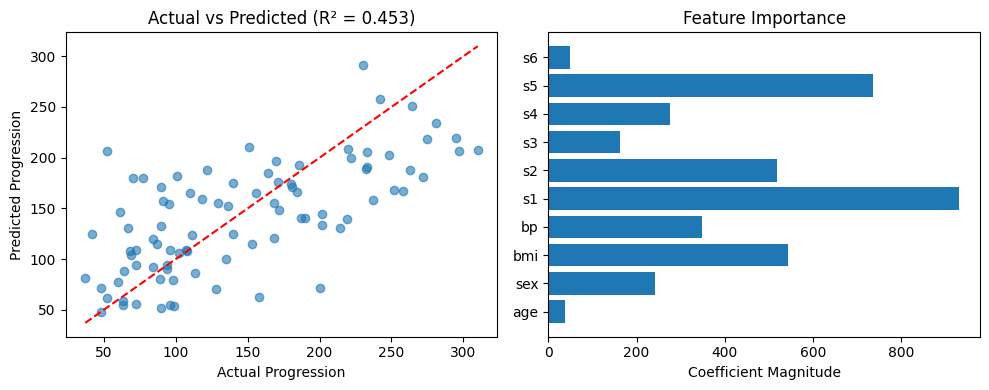

In [19]:
# Visualize model performance
plt.figure(figsize=(10, 4))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test_diab, y_test_pred, alpha=0.6)
plt.plot([y_test_diab.min(), y_test_diab.max()], 
         [y_test_diab.min(), y_test_diab.max()], 'r--')
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.title(f'Actual vs Predicted (R² = {test_r2:.3f})')

# Feature importance
plt.subplot(1, 2, 2)
importance = np.abs(diabetes_model.coef_)
plt.barh(diabetes.feature_names, importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## 🗣️ Discussion Break (3 minutes)

**Question for students:** *"To switch from LinearRegression to a RandomForest, what would you need to change in our code?"*

**Think about:**
- Which lines stay the same?
- Which lines change?
- Why is this API design powerful?

---

# 40–60 min: Transition to Classification

**Goal:** Understand when to predict categories vs. continuous values

**Instructor Notes:**
• This is a conceptual shift - spend time on it
• Use concrete examples students can relate to
• Ask students for their own examples of each type
• Emphasize that the workflow remains the same, just different models

## Regression vs. Classification: The Key Difference

In [20]:
# The fundamental difference
print("🔍 REGRESSION vs CLASSIFICATION:")
print()
print("📈 REGRESSION:")
print("   • Predict NUMBERS: 150.5, 23.7, 89.2")
print("   • Examples: house prices, temperature, disease progression")
print("   • Goal: Find best-fit line/curve")

print("\n🏷️  CLASSIFICATION:")
print("   • Predict CATEGORIES: 'spam', 'cat', 'malignant'")
print("   • Examples: email type, animal species, cancer diagnosis")
print("   • Goal: Find decision boundaries")

🔍 REGRESSION vs CLASSIFICATION:

📈 REGRESSION:
   • Predict NUMBERS: 150.5, 23.7, 89.2
   • Examples: house prices, temperature, disease progression
   • Goal: Find best-fit line/curve

🏷️  CLASSIFICATION:
   • Predict CATEGORIES: 'spam', 'cat', 'malignant'
   • Examples: email type, animal species, cancer diagnosis
   • Goal: Find decision boundaries


## Visual Comparison: Lines vs. Boundaries

**Instructor Notes:**
• Visual is crucial here - make sure plot is clearly visible
• Point out: regression finds lines, classification finds boundaries
• Ask: "What happens near the decision boundary?"
• Connect to real applications (medical diagnosis, spam detection)

Let's see the difference in action:

In [21]:
# Create example data for comparison
np.random.seed(42)

# Regression example
x_reg = np.random.uniform(-2, 2, 50)
y_reg = 1.5 * x_reg + 0.5 + np.random.normal(0, 0.3, 50)

# Classification example
x1_class = np.random.uniform(-2, 2, 60)
x2_class = np.random.uniform(-2, 2, 60)
class_labels = (x1_class + x2_class > 0).astype(int)

print("✅ Example datasets created")

✅ Example datasets created


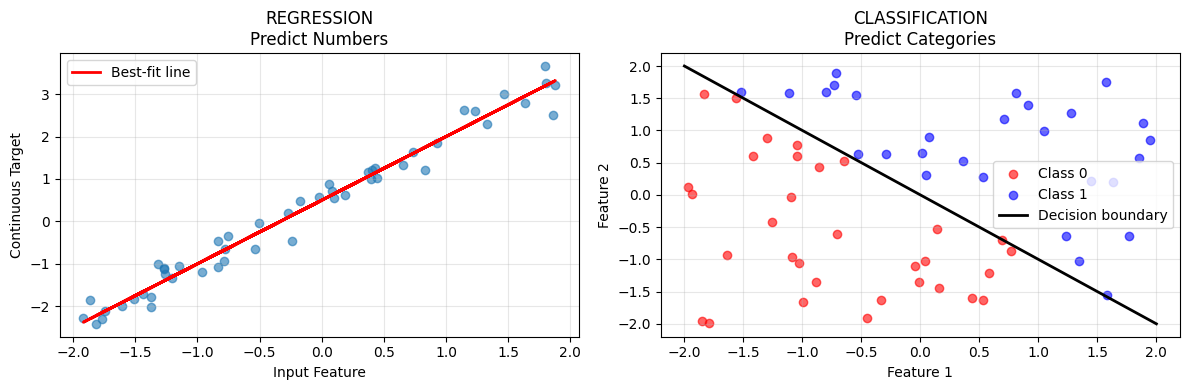

In [22]:
# Visualize the difference
plt.figure(figsize=(12, 4))

# Left: Regression
plt.subplot(1, 2, 1)
plt.scatter(x_reg, y_reg, alpha=0.6)
plt.plot(x_reg, 1.5 * x_reg + 0.5, 'r-', linewidth=2, label='Best-fit line')
plt.xlabel('Input Feature')
plt.ylabel('Continuous Target')
plt.title('REGRESSION\nPredict Numbers')
plt.legend()
plt.grid(True, alpha=0.3)

# Right: Classification
plt.subplot(1, 2, 2)
colors = ['red', 'blue']
for i in range(2):
    mask = class_labels == i
    plt.scatter(x1_class[mask], x2_class[mask], c=colors[i], 
               label=f'Class {i}', alpha=0.6)

# Decision boundary
boundary_x = np.linspace(-2, 2, 100)
boundary_y = -boundary_x
plt.plot(boundary_x, boundary_y, 'k-', linewidth=2, label='Decision boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('CLASSIFICATION\nPredict Categories')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Three Key Classification Algorithms

**Instructor Notes:**
• Give intuitive explanations before diving into code
• Use analogies: k-NN is like asking neighbors, Logistic Regression is like drawing lines
• Mention when each might be useful (interpretability, speed, performance)
• Ask students which they'd choose for different scenarios

Today we'll explore three fundamental approaches:

In [23]:
# Three classification algorithms overview
print("🧠 THREE CLASSIFICATION APPROACHES:")
print()
print("1️⃣  k-NEAREST NEIGHBORS (k-NN)")
print("   💡 'You are who your neighbors are'")
print("   🎯 Look at k closest points, vote on class")

print("\n2️⃣  LOGISTIC REGRESSION")
print("   💡 'Find the best linear separator'")
print("   🎯 Draw straight line between classes")

print("\n3️⃣  NAÏVE BAYES")
print("   💡 'Use probability with independence assumption'")
print("   🎯 Apply statistics to classify")

🧠 THREE CLASSIFICATION APPROACHES:

1️⃣  k-NEAREST NEIGHBORS (k-NN)
   💡 'You are who your neighbors are'
   🎯 Look at k closest points, vote on class

2️⃣  LOGISTIC REGRESSION
   💡 'Find the best linear separator'
   🎯 Draw straight line between classes

3️⃣  NAÏVE BAYES
   💡 'Use probability with independence assumption'
   🎯 Apply statistics to classify


## 🗣️ Discussion Break (2 minutes)

**Question for students:** *"For spam email detection, which algorithm would you try first and why?"*

**Consider:**
- Email features (words, sender, etc.)
- Need for interpretability
- Speed requirements
- Data size

---

# 60–90 min: Shallow Classification Models with Scikit-learn

**Goal:** Apply the same pipeline to classification and compare three algorithms

**Instructor Notes:**
• Show how the SAME workflow applies to classification
• Point out changes: accuracy instead of MSE, different models
• Encourage students to see the patterns
• Build confidence by showing they already know the process

## Dataset: The Classic Iris Dataset

**Instructor Notes:**
• Mention this is the "hello world" of ML datasets
• Point out it's small and clean - perfect for learning
• Ask students to guess which features might be most important
• Note that real data is messier, but principles are the same

We'll use the famous iris flowers dataset - perfect for learning classification:

In [24]:
# Step 1: Load iris dataset
iris = load_iris()
X_iris = iris.data        # 4 features: sepal/petal length/width
y_iris = iris.target      # 3 species: setosa, versicolor, virginica

print(f"Dataset: {X_iris.shape[0]} flowers, {X_iris.shape[1]} measurements")
print(f"Species: {iris.target_names}")
print(f"Features: {iris.feature_names}")

Dataset: 150 flowers, 4 measurements
Species: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [25]:
# Step 2: Train/test split (same function!)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

print(f"Training: {X_train_iris.shape[0]} flowers")
print(f"Testing: {X_test_iris.shape[0]} flowers")
print("✅ Balanced split maintained with stratify")

Training: 105 flowers
Testing: 45 flowers
✅ Balanced split maintained with stratify


In [26]:
# Let's explore our classification dataset
print("Iris dataset shape:", X_iris.shape, y_iris.shape)
print("Feature names:", iris.feature_names)
print("Target classes:", iris.target_names)

Iris dataset shape: (150, 4) (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


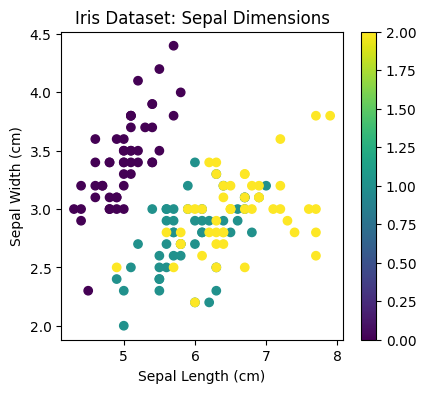

In [27]:
# Visualize the iris dataset (2D projection)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Dimensions')
plt.colorbar()

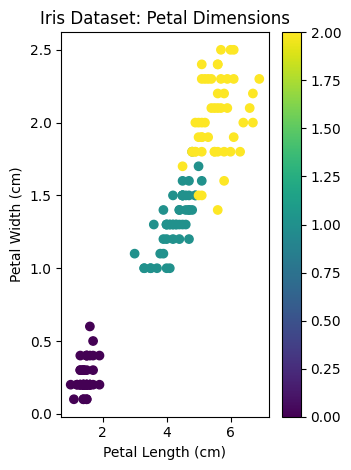

In [28]:
plt.subplot(1, 2, 2)
plt.scatter(X_iris[:, 2], X_iris[:, 3], c=y_iris, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Petal Dimensions')
plt.colorbar()
plt.tight_layout()
plt.show()

**Instructor Notes:**
• Point out the clear clustering in the visualization
• Ask: "Why do you think the clusters are so distinct?"
• Connect to biological reality - different species have different measurements
• This is why classification works well on this dataset

Notice how the data points form distinct clusters by color (species). This is what makes classification possible - we can learn decision boundaries that separate these groups.

### Training Our First Classification Model: k-Nearest Neighbors

**Instructor Notes:**
• Start with k-NN because it's most intuitive
• Explain k=3: look at 3 closest neighbors, majority vote wins
• Ask: "What happens if k=1? What if k=all data points?"
• Connect to everyday decision making (asking friends for advice)

Let's start with k-NN, which makes predictions based on the k closest training examples.

In [29]:
# Split the iris data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42
)

In [30]:
# Train k-NN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_iris, y_train_iris)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
# Make predictions and evaluate
y_pred_knn = knn.predict(X_test_iris)
accuracy_knn = knn.score(X_test_iris, y_test_iris)
print(f"k-NN Accuracy: {accuracy_knn:.3f}")
print(f"Predictions: {y_pred_knn[:10]}")
print(f"Actual:      {y_test_iris[:10]}")

k-NN Accuracy: 1.000
Predictions: [1 0 2 1 1 0 1 2 1 1]
Actual:      [1 0 2 1 1 0 1 2 1 1]


### Logistic Regression for Classification

**Instructor Notes:**
• Address the confusing name - "regression" but does classification
• Explain it finds linear decision boundaries (like drawing lines between classes)
• Mention it outputs probabilities, then converts to class predictions
• Point out identical API - only the model name changed

Despite its name, logistic regression is actually a classification algorithm! It uses probability curves instead of straight lines.

In [32]:
# Train logistic regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_iris, y_train_iris)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [33]:
# Evaluate logistic regression
y_pred_log = log_reg.predict(X_test_iris)
accuracy_log = log_reg.score(X_test_iris, y_test_iris)
print(f"Logistic Regression Accuracy: {accuracy_log:.3f}")

Logistic Regression Accuracy: 1.000


### Naïve Bayes Classification

**Instructor Notes:**
• Explain the "naïve" assumption: features are independent
• Give example: in spam detection, assumes "free" and "money" are independent
• Point out this assumption is often wrong but algorithm still works well
• Mention it's especially good for text classification

Naïve Bayes uses probability theory, assuming features are independent (which is often "naïve" but works well in practice).

In [34]:
# Train Naïve Bayes
nb = GaussianNB()
nb.fit(X_train_iris, y_train_iris)

,priors,None
,var_smoothing,1e-09


In [35]:
# Evaluate Naïve Bayes
y_pred_nb = nb.predict(X_test_iris)
accuracy_nb = nb.score(X_test_iris, y_test_iris)
print(f"Naïve Bayes Accuracy: {accuracy_nb:.3f}")

Naïve Bayes Accuracy: 0.978


### Comparing Our Models

**Instructor Notes:**
• Point out that different algorithms can give different results
• Discuss why iris dataset gives such high accuracy (clean, simple)
• Mention that in practice, you try multiple approaches
• Ask: "Which model would you choose and why?"

Let's see how all three algorithms performed:

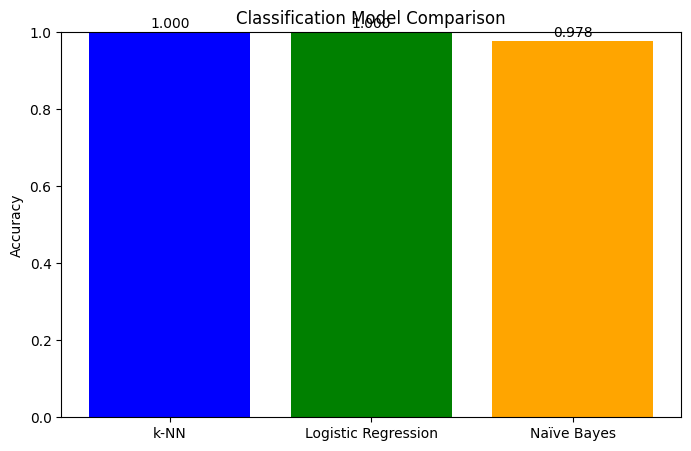

In [36]:
# Compare all three models
models = ['k-NN', 'Logistic Regression', 'Naïve Bayes']
accuracies = [accuracy_knn, accuracy_log, accuracy_nb]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Classification Model Comparison')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center')
plt.show()

## Section 5: Guided Lab Exercise (90-115 min)

**🔬 Your Turn: Practice the Complete Workflow**

**Instructor Notes:**
• Switch to guided practice - students should code along
• Walk around and help students who are stuck
• Encourage pair programming if helpful
• Don't just show solutions - let them struggle a bit first
• Celebrate when students get it working

Now it's time to practice what you've learned! Work through this exercise step by step.

### Exercise: Wine Quality Prediction

**Instructor Notes:**
• Give students 2-3 minutes per step before showing solution
• Ask volunteers to share their answers before revealing
• Point out this is a different domain but same workflow
• Highlight any interesting results or differences from iris

Let's work with a wine quality dataset. Your task is to predict wine quality (classification) using the same workflow we've practiced.

In [37]:
# Load wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

print("Wine dataset loaded!")
print(f"Features: {wine.feature_names[:5]}...") # Show first 5
print(f"Classes: {wine.target_names}")
print(f"Shape: {X_wine.shape}")

Wine dataset loaded!
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']...
Classes: ['class_0' 'class_1' 'class_2']
Shape: (178, 13)


**Step 1:** Split the wine data into training and testing sets (use 70% for training)

In [38]:
# Step 1 Solution: Split the data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42
)
print(f"Training set: {X_train_wine.shape}")
print(f"Test set: {X_test_wine.shape}")

Training set: (124, 13)
Test set: (54, 13)


**Step 2:** Train all three classification models on the wine data

In [39]:
# Step 2 Solution: Train all models
wine_knn = KNeighborsClassifier(n_neighbors=5)
wine_log = LogisticRegression(random_state=42, max_iter=1000)
wine_nb = GaussianNB()

wine_knn.fit(X_train_wine, y_train_wine)
wine_log.fit(X_train_wine, y_train_wine)
wine_nb.fit(X_train_wine, y_train_wine)
print("All models trained!")

All models trained!


**Step 3:** Evaluate and compare the models' performance

In [40]:
# Step 3 Solution: Evaluate and compare
wine_accuracies = [
    wine_knn.score(X_test_wine, y_test_wine),
    wine_log.score(X_test_wine, y_test_wine),
    wine_nb.score(X_test_wine, y_test_wine)
]

for model, acc in zip(['k-NN', 'Logistic Regression', 'Naïve Bayes'], wine_accuracies):
    print(f"{model}: {acc:.3f}")

k-NN: 0.741
Logistic Regression: 1.000
Naïve Bayes: 1.000


## Section 6: Wrap-up and Key Takeaways (115-120 min)

**🎯 What We've Accomplished Today**

**Instructor Notes:**
• Summarize the journey from scratch implementation to sklearn
• Ask students what surprised them most
• Emphasize the universal workflow - they can now tackle any supervised ML problem
• Preview what's coming next in the course
• End on an encouraging note about their progress

In this session, you've successfully bridged from mathematical foundations to practical machine learning tools!

### Key Concepts Mastered:

1. **Universal ML Workflow**: Load → Split → Fit → Predict → Evaluate
2. **Scikit-learn Consistency**: Same API across all algorithms
3. **Classification vs Regression**: Discrete categories vs continuous values
4. **Three Classification Algorithms**: k-NN, Logistic Regression, Naïve Bayes
5. **Model Comparison**: How to evaluate and compare different approaches

### Next Steps:

- **Practice**: Try these techniques on your own datasets
- **Explore**: Experiment with different parameter values (k in k-NN, etc.)
- **Learn More**: Look into other classification algorithms (Decision Trees, Random Forest, SVM)
- **Real Applications**: Consider how classification applies to your field of interest

**Great work today! You've taken a major step from theory to practice in machine learning! 🚀**